In [60]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [61]:
def resize(frame):
    dimensions = (200,200)
    return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

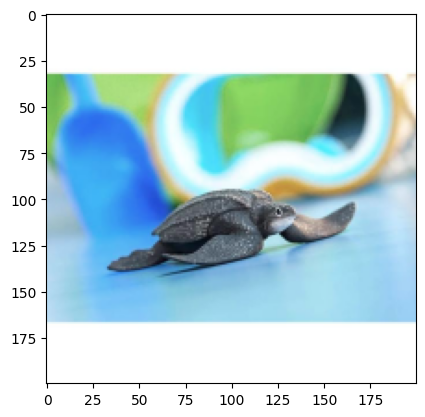

In [62]:
img = cv.imread(f'data/train/train/image_id_238.jpg')
img = resize(img)
plt.imshow(img)
# img.shape

In [63]:
with open('data/train_annotations') as img_desc:
    labels = json.load(img_desc)

In [64]:
def check_len(id):
    match len(f'{id}'):
        case 1: return f'00{id}'
        case 2: return f'0{id}'
        case 3: return f'{id}'

In [65]:
label = list()
for x in labels:
    label.append(x['category_id'])
label = np.array(label)

In [66]:
X = list()
for id in range(len(label)):
    img = cv.imread(f'data/train/train/image_id_{check_len(id)}.jpg')
    img = resize(img)
    X.append(img)
X = np.array(X)

In [67]:
is_penguin = pd.DataFrame(np.where(label == 1, 'penguin', 'turtle'))
labels = pd.get_dummies(is_penguin)
labels.columns = ['penguin', 'turtle']

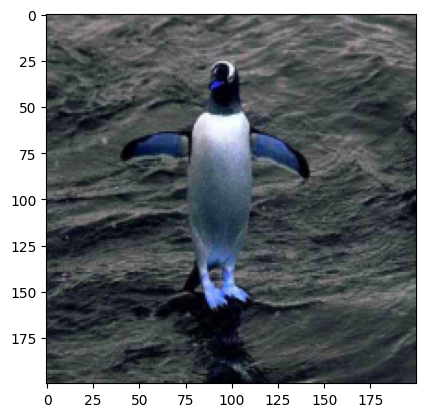

In [68]:
plt.imshow(X[1])

In [69]:
labels.to_csv('data/training/train_label.csv')

In [70]:
np.save(arr = X, file = 'data/training/train_data', allow_pickle=True)

In [71]:
# valid = np.load(file = 'data/validation_data/valid_data.npy')

In [72]:
# valid.shape